In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("D://data_2_var.csv")

In [3]:
df.head(5)

-122.7406674  -130.5720846
0   -121.531419   -129.938929
1   -134.917019   -130.141832
2   -120.605951   -125.760932
3   -129.894781   -112.785214
4   -134.366669   -116.000000

In [4]:
df.columns =['A', 'B']


In [5]:
#renaming the columns names as col_A , Col_B
df.rename(columns = {'A':'col_A', 
                       'B':'col_B'}, 
            inplace = True)

In [6]:
df.head(6)

col_A       col_B
0 -121.531419 -129.938929
1 -134.917019 -130.141832
2 -120.605951 -125.760932
3 -129.894781 -112.785214
4 -134.366669 -116.000000
5 -115.563739 -126.267621

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1110 entries, 0 to 1109
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   col_A   1110 non-null   float64
 1   col_B   1110 non-null   float64
dtypes: float64(2)
memory usage: 17.5 KB


In [8]:
df.describe()

col_A        col_B
count  1110.000000  1110.000000
mean      6.899714   -26.093318
std      79.324069    69.755980
min    -134.962839  -132.422167
25%     -53.366669   -76.994298
50%      15.739103   -46.036319
75%      76.193907     7.598960
max     134.605775   134.425495

In [9]:
df.shape


(1110, 2)

In [10]:
# this describe is ther any missing value in dataset 0 represents no missing values are available in these columns
df.isnull().sum()


col_A    0
col_B    0
dtype: int64

In [11]:
df['col_A'].value_counts()

-125.366669    10
 112.633331     8
 80.633331      5
-131.366669     4
-124.366669     4
               ..
-47.366669      1
 82.490206      1
-115.703631     1
-6.995212       1
 107.856684     1
Name: col_A, Length: 990, dtype: int64

In [12]:
df['col_B'].value_counts()

-95.000000     19
-32.000000     10
 131.000000     9
-33.000000      8
-75.000000      6
               ..
-98.943394      1
-51.142230      1
-15.031056      1
-58.381583      1
-116.000000     1
Name: col_B, Length: 968, dtype: int64

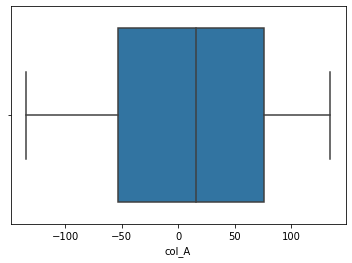

In [13]:
# boxplot finds the outliers in the dataset 
# First Q1 is Quartile Range as 25th and Second as Q3 value i
# Inter Qrautile Range as Q3-Q1
# if there are outilers available in dataset some dotes values are shown after the Q3 and before Q1.
sns.boxplot(data =df,x="col_A")
plt.show()

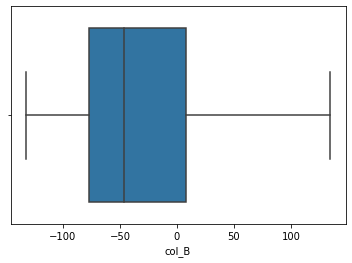

In [14]:
sns.boxplot(data =df,x="col_B")
plt.show()

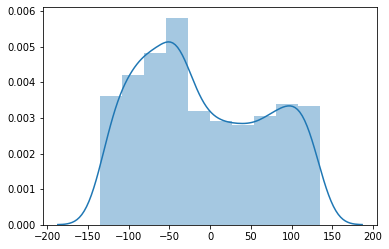

In [15]:
sns.distplot(df, bins=10)
plt.show()

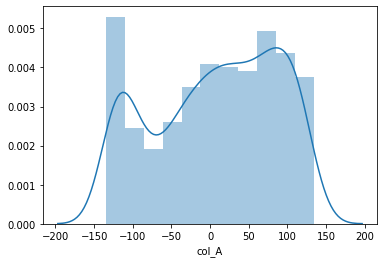

In [16]:
sns.distplot(df['col_A'])
plt.show()

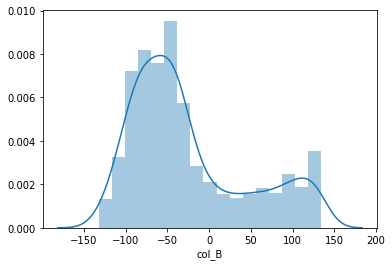

In [17]:
sns.distplot(df['col_B'])
plt.show()

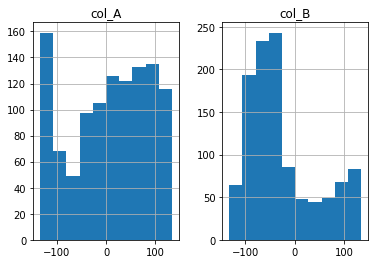

In [18]:
#feature Engineering
#for right skewed data used nth root
#for left skwed data used log root
df.hist()
plt.show()

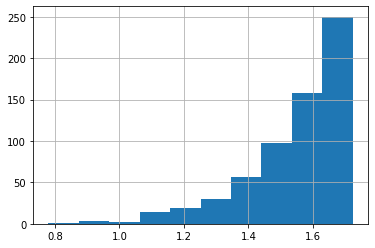

In [62]:
df['sqr_col_A'] = df['col_A']**(1/9)
df['sqr_col_A'].hist()
plt.show()

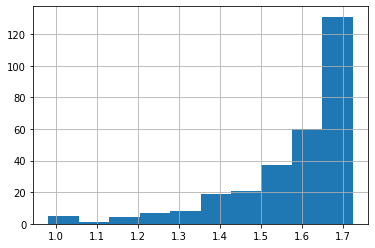

In [63]:
df['sqr_col_B'] = df['col_B']**(1/9)
df['sqr_col_B'].hist()
plt.show()

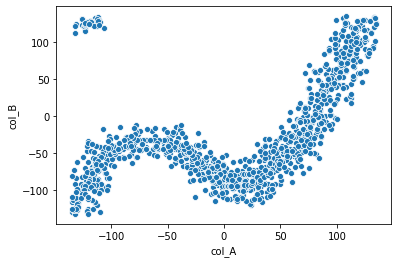

In [19]:
sns.scatterplot(x = 'col_A',y='col_B', data = df)
plt.show()

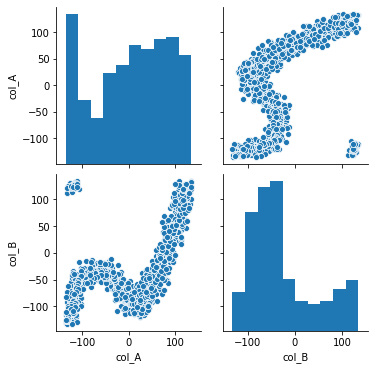

In [20]:
sns.pairplot(df)
plt.show()

In [21]:
df.corr()


col_A     col_B
col_A  1.000000  0.454607
col_B  0.454607  1.000000

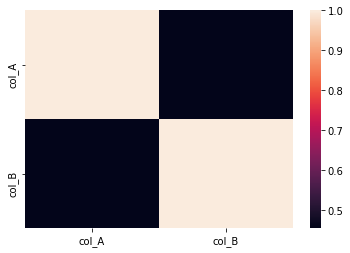

In [22]:
sns.heatmap(df.corr())
plt.show()

In [23]:
X = df.drop(columns = 'col_A')
y = df['col_A']

In [24]:
X

col_B
0    -129.938929
1    -130.141832
2    -125.760932
3    -112.785214
4    -116.000000
...          ...
1105  121.000000
1106  123.609122
1107  127.197394
1108  128.170885
1109  123.087950

[1110 rows x 1 columns]

In [25]:
y

0      -121.531419
1      -134.917019
2      -120.605951
3      -129.894781
4      -134.366669
           ...    
1105   -115.366669
1106   -119.954237
1107   -109.942155
1108   -111.515368
1109   -110.344221
Name: col_A, Length: 1110, dtype: float64

In [26]:
# Train|Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [27]:
# Modelling 
from sklearn.linear_model import LinearRegression 
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
#Intercept and Coefficients
print("Model Intercept:", model.intercept_)
print("Model Intercept:", model.coef_)

Model Intercept: 19.710440046107408
Model Intercept: [0.5053494]


In [29]:
#predictions 
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)


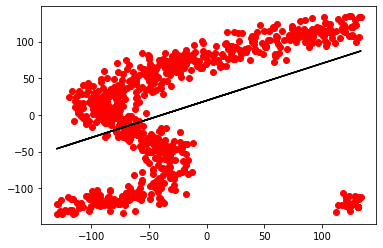

In [30]:
#Plotting the Least Square Lines
plt.scatter(X_train,y_train,color ='red')

train_predictions = model.predict(X_train)
plt.plot(X_train,train_predictions ,color = "black")
plt.show()


In [31]:
#Evaluation Metrices are used
#Mean Absolute Error
#Mean Squared Error
#Root Mean Squared Error

train_res = y_train-train_predictions
test_res = y_test -test_predictions

In [32]:
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y_test,test_predictions)
MAE

62.05137147209636

In [33]:
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test,test_predictions)
MSE

5198.000121276305

In [34]:
RMSE = np.sqrt(MSE)
RMSE

72.09715751176537

In [35]:
model.score(X_train,y_train)

0.2060118275199806

In [36]:
model.score(X_test,y_test)

0.207454791350562

In [37]:
from sklearn.metrics import r2_score
r2_score(y_test,test_predictions)


0.207454791350562

In [56]:
#cross validation 
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model,X,y,cv=5)
scores

array([-2.76224665, -3.69856831, -1.26056592, -2.04993185, -1.50444705])

In [57]:
scores.mean()

-2.2551519548937176

In [40]:
#diagnosis Test
import statsmodels.formula.api as smf
m = smf.ols("y~X",data = df).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.207
Model:                            OLS   Adj. R-squared:                  0.206
Method:                 Least Squares   F-statistic:                     288.6
Date:                Sat, 18 Jun 2022   Prob (F-statistic):           1.04e-57
Time:                        15:48:09   Log-Likelihood:                -6300.7
No. Observations:                1110   AIC:                         1.261e+04
Df Residuals:                    1108   BIC:                         1.262e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     20.3890      2.265      9.001      0.000      15.944      24.834
X              0.5170      0.030     16.989      0.000       0.457       0.577
==============================================================================
Omnibus:                      155.889   Durbin-Watson:                   0.061
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              223.263
Skew:                          -1.078   Prob(JB):                     3.30e-49
Kurtosis:                       3.425   Cond. No.                         79.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

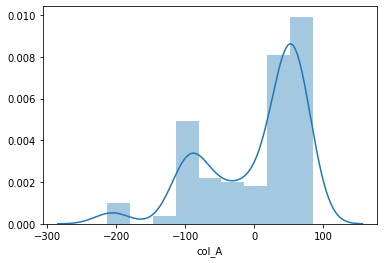

In [41]:
#Normality of errors
sns.distplot(test_res,kde=True)
plt.show()

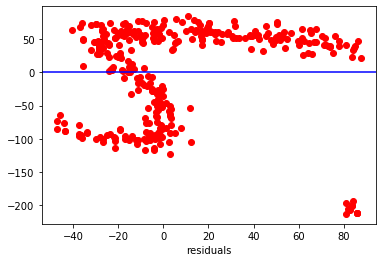

In [42]:
#Homoscadesicity
plt.scatter(test_predictions,test_res,c = "r")
plt.axhline(y=0,color='blue')
plt.xlabel("fitted_values")
plt.xlabel("residuals")
plt.show()

In [43]:
final_model = LinearRegression()
final_model.fit(X,y)
final_model.coef_

array([0.51696369])

In [ ]:
#final model will predict on input value as 131 and output value : 88.111

In [44]:
final_model.predict([[131]])

array([88.11125461])